## Make a subset of a data cube

This notebook shows how to view the metadata of an xcube dataset and how to make a subset xcube dataset for a particular region of interest. 

---

Importing necessary libraries and functions:

In [1]:
import shapely
import xarray as xr

from xcube.core.dsio import open_cube
from xcube.core.geom import clip_dataset_by_geometry

Load an xcube dataset containing Sea Surface Temperature data for the Southern North Sea from bucket:

In [2]:
cube = open_cube('https://s3.eu-central-1.amazonaws.com/xcube-examples/bc-sst-sns-l2c-2017_1x704x640.zarr', s3_kwargs=dict(anon=True) )

View the metadata of the cube:

In [3]:
cube

<xarray.Dataset>
Dimensions:       (bnds: 2, lat: 5632, lon: 10240, time: 365)
Coordinates:
  * lat           (lat) float64 62.67 62.66 62.66 62.66 ... 48.01 48.0 48.0
    lat_bnds      (lat, bnds) float64 dask.array<chunksize=(5632, 2), meta=np.ndarray>
  * lon           (lon) float64 -16.0 -16.0 -15.99 -15.99 ... 10.66 10.66 10.67
    lon_bnds      (lon, bnds) float64 dask.array<chunksize=(10240, 2), meta=np.ndarray>
  * time          (time) datetime64[ns] 2017-01-01T12:00:00 ... 2017-12-31T12...
    time_bnds     (time, bnds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    analysed_sst  (time, lat, lon) float64 dask.array<chunksize=(1, 704, 640), meta=np.ndarray>
Attributes: (12/32)
    acknowledgment:             Data Cube produced based on data provided by ...
    comment:                    
    contributor_name:           
    contributor_role:           
    creator_email:              info@brockmann-consult.de
    creator_name:               Brockmann Consult GmbH
    ...                         ...
    publisher_url:              https://www.brockmann-consult.de
    references:                 https://dcs4cop.eu/
    source:                     CMEMS Global SST & Sea Ice Anomaly Data Cube
    standard_name_vocabulary:   
    summary:                    
    title:                      DCS4COP CMEMS Global SST & Sea Ice Anomaly Da...

Print out the time stamps avaialbe in the cube:

In [4]:
# cube.time.values

Print out the number of time stamps:

In [5]:
cube.time.shape

(365,)

View the metadata of a cubes variable:

In [6]:
cube.analysed_sst

,Array,Chunk
Bytes,156.84 GiB,3.44 MiB
Shape,"(365, 5632, 10240)","(1, 704, 640)"
Count,46721 Tasks,46720 Chunks
Type,float64,numpy.ndarray


View the shape and the chunking of a data cubes variable:

In [7]:
cube.analysed_sst.data

,Array,Chunk
Bytes,156.84 GiB,3.44 MiB
Shape,"(365, 5632, 10240)","(1, 704, 640)"
Count,46721 Tasks,46720 Chunks
Type,float64,numpy.ndarray


Plot a cubes variable for a specific time stamp:

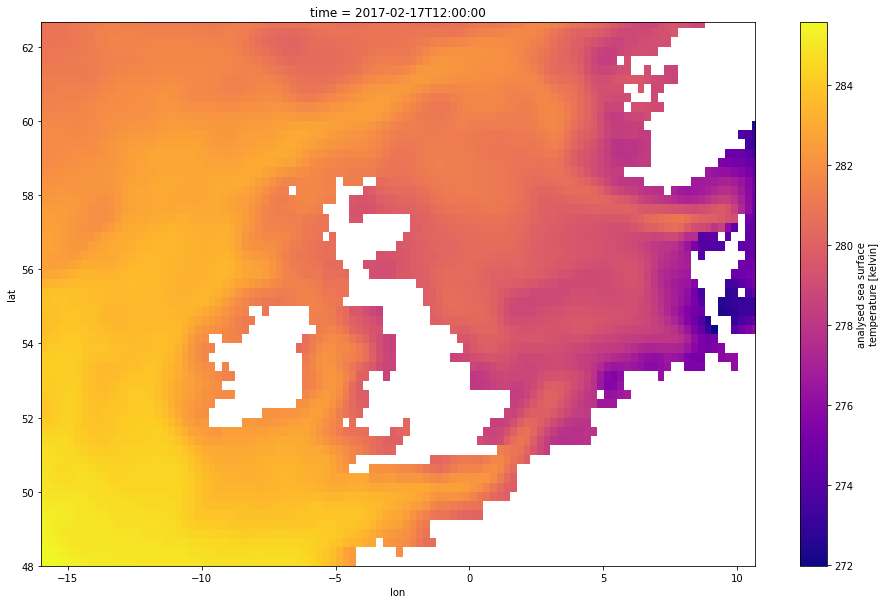

In [8]:
cube.analysed_sst.isel(time=47).plot.imshow(figsize=(16,10), cmap='plasma')

Define an area to make a subset of a cube:

In [9]:
x1 = 0.0  # degree
y1 = 50.0  # degree
x2 = 5.0  # degree
y2 = 52.0  # degree

bbox = x1, y1, x2, y2

Convert bounding box into a shapely object:

In [10]:
bbox = shapely.geometry.box(*bbox)

Clip cube by using the bounding box:

In [11]:
subset_cube = clip_dataset_by_geometry(cube, bbox)

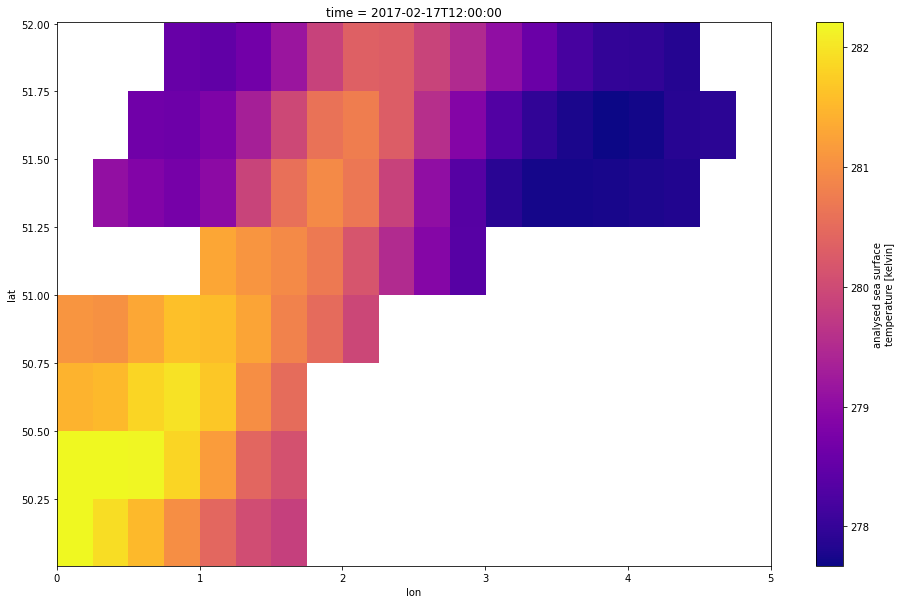

In [12]:
subset_cube.analysed_sst.isel(time=47).plot.imshow(figsize=(16,10), cmap='plasma')

The subset cube can be saved locally with:

In [13]:
# subset_cube.to_zarr('subset_cube_output_path.zarr')